In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/pima-indians-diabetes-database'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
from sklearn.model_selection import train_test_split
X = dataset.drop('Outcome', axis=1)
Y= dataset['Outcome']
X , X_test , Y, Y_test = train_test_split(X , Y,test_size=0.3, random_state=42)
X.shape , Y.shape , X_test.shape , Y_test.shape

((537, 8), (537,), (231, 8), (231,))

**FEATURE SCALING**

In [5]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
std[std == 0] = 1
X_scaled = (X - mean) / std
X_test_scaled = (X_test - mean) / std
print(np.mean(X_scaled, axis=0))   # should be near 0
print(np.std(X_scaled, axis=0))    # should be near 1
print(np.mean(X_test_scaled, axis=0))   # should also be close to 0
print(np.std(X_test_scaled, axis=0))    # close to 1, but not exactly


Pregnancies                 6.615854e-17
Glucose                     2.083994e-16
BloodPressure               1.885518e-16
SkinThickness               7.277440e-17
Insulin                    -4.631098e-17
BMI                        -5.524238e-16
DiabetesPedigreeFunction   -9.923781e-17
Age                        -2.480945e-16
dtype: float64
Pregnancies                 1.0
Glucose                     1.0
BloodPressure               1.0
SkinThickness               1.0
Insulin                     1.0
BMI                         1.0
DiabetesPedigreeFunction    1.0
Age                         1.0
dtype: float64
Pregnancies                 0.121155
Glucose                     0.004669
BloodPressure              -0.106636
SkinThickness               0.022434
Insulin                    -0.001059
BMI                         0.007408
DiabetesPedigreeFunction    0.019031
Age                         0.047387
dtype: float64
Pregnancies                 1.101151
Glucose                     0.962703
B

**Initialize Parameters**

In [6]:
n_samples, n_features= X.shape
print(n_features)
w = np.zeros((n_features, 1))
b = 0

8


**SIGMOID FUNCTION ( 0,1 RANGER )**

In [7]:
import numpy as np

class LogisticRegression:    
    def __init__(self, learning_rate=0.05, n_iterations=5000, lambda_=0.1, threshold=0.45):
        self.lr = learning_rate
        self.n_iters = n_iterations
        self.lambda_ = lambda_
        self.threshold = threshold
        self.W = None
        self.b = None
        self.cost = []
    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)   # prevents overflow
        return 1 / (1 + np.exp(-z))

    def fit(self, X, Y):
        Y = Y.reshape(-1, 1)
        n_samples, n_features = X.shape
        self.W = np.random.randn(n_features, 1) * 0.01
        self.b = np.random.randn() * 0.01
        for i in range(self.n_iters):
            Z = np.dot(X, self.W) + self.b
            y_hat = self._sigmoid(Z)
            dZ = y_hat - Y
            dW = (1/n_samples) * (np.dot(X.T, dZ) + self.lambda_ * self.W)
            db = (1/n_samples) * np.sum(dZ)
            self.W = self.W - self.lr * dW
            self.b = self.b - self.lr * db
            if i % 100 == 0:
                y_hat_safe = np.clip(y_hat, 1e-10, 1 - 1e-10) 
                cost = (-1/n_samples) * np.sum(Y * np.log(y_hat_safe) + (1 - Y) * np.log(1 - y_hat_safe)) \
                       + (self.lambda_ / (2 * n_samples)) * np.sum(self.W**2)
                self.cost.append(cost)

    def predict(self, X):
        Z = np.dot(X, self.W) + self.b
        probabilities = self._sigmoid(Z)
        y_predicted_cls = np.where(probabilities >= self.threshold, 1, 0)
        return y_predicted_cls.flatten()

In [8]:
Y = Y.values
Y_test = Y_test.values
model = LogisticRegression(learning_rate=0.05, n_iterations=8000, lambda_=0.01, threshold=0.5)
model.fit(X_scaled, Y)
y_pred = model.predict(X_test_scaled)
accuracy = np.mean(y_pred == Y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 73.59%


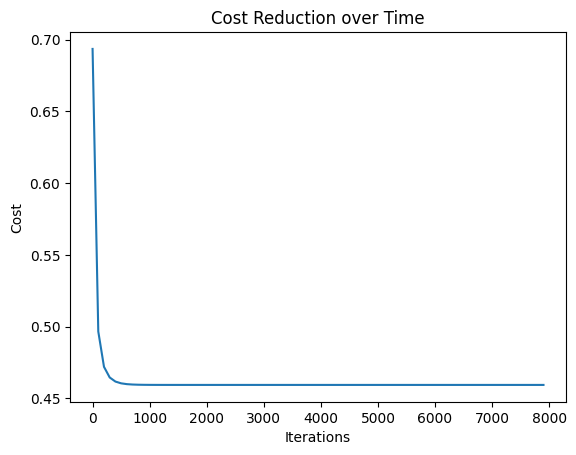

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(0, model.n_iters, 100), model.cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction over Time")
plt.show()


**COMPARING MY MODEL TO SICKIT LEARN MODEL**

In [10]:
# ================================
# Compare Custom vs Sklearn Model
# ================================

from sklearn.linear_model import LogisticRegression as SkLogisticRegression
from sklearn.metrics import accuracy_score

# --- Your Model ---
model = LogisticRegression(learning_rate=0.05, n_iterations=8000, lambda_=0.01, threshold=0.5)
model.fit(X_scaled, Y)
y_pred_custom = model.predict(X_test_scaled)
custom_acc = accuracy_score(Y_test, y_pred_custom) * 100

# --- Sklearn Model ---
sk_model = SkLogisticRegression(max_iter=5000)
sk_model.fit(X_scaled, Y)
y_pred_sklearn = sk_model.predict(X_test_scaled)
sklearn_acc = accuracy_score(Y_test, y_pred_sklearn) * 100

# --- Compare ---
print("===== Model Accuracy Comparison =====")
print(f"Custom Logistic Regression Accuracy:   {custom_acc:.2f}%")
print(f"Scikit-learn Logistic Regression Accuracy: {sklearn_acc:.2f}%")

if custom_acc > sklearn_acc:
    print("\n✅ Your custom model outperformed sklearn!")
elif custom_acc > sklearn_acc:
    print("\n🤖 Sklearn model performed better (as expected).")
else : 
    print("TIED , good work!!")


===== Model Accuracy Comparison =====
Custom Logistic Regression Accuracy:   73.59%
Scikit-learn Logistic Regression Accuracy: 73.59%
TIED , good work!!
